In [1]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.7, random_state=0)

ms = MeanShift(bandwidth=0.8)
cluster_labels = ms.fit_predict(X)
print(np.unique(cluster_labels))

[0 1 2 3 4 5]


In [2]:
ms = MeanShift(bandwidth=1)
cluster_labels = ms.fit_predict(X)
print(np.unique(cluster_labels))

[0 1 2]


In [3]:
from sklearn.cluster import estimate_bandwidth

band_width = estimate_bandwidth(X)
print(np.round(band_width, 3))

1.816


In [4]:
import pandas as pd

cluster_df = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
cluster_df['target'] = y

ms = MeanShift(bandwidth=estimate_bandwidth(X))
cluster_labels = ms.fit_predict(X)
print(np.unique(cluster_labels))

[0 1 2]


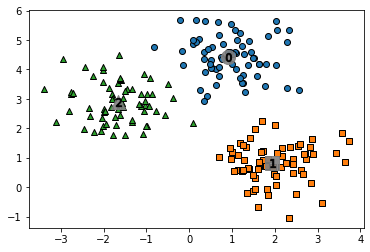

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

cluster_df['meanshift_label'] = cluster_labels
centers = ms.cluster_centers_
labels = np.unique(cluster_labels)
markers = ['o', 's', '^', 'x', '*']

for label in labels:
    label_cluster = cluster_df[cluster_df['meanshift_label']==label]
    center_x_y = centers[label]
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolors='k', marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', alpha=0.9, marker='$%d$' % label)

plt.show()

In [11]:
print(cluster_df.groupby('target')['meanshift_label'].value_counts())

target  meanshift_label
0       0                  67
1       1                  67
2       2                  66
Name: meanshift_label, dtype: int64
